# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_combined = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
print(data_combined.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [19]:
# Checking the number of mice
mouse_array = data_combined["Mouse ID"].unique()
print(f"Number of unique mice: {len(mouse_array)}")

Number of unique mice: 249


In [20]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate = data_combined.duplicated(['Mouse ID', 'Timepoint'])
print(data_combined[duplicate])

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [21]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_data = data_combined[data_combined['Mouse ID'] == "g989"]
print(duplicate_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = data_combined[data_combined['Mouse ID'] != "g989"]
print(clean_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [23]:
# Checking the number of mice in the clean DataFrame
clean_mouse_array = clean_data["Mouse ID"].unique()
clean_mouse_count = len(clean_mouse_array)
print(f"Number of unique mice after cleaning: {clean_mouse_count}")

Number of unique mice after cleaning: 248


## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stat_table = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stat_table.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume SEM"]

print(summary_stat_table)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

## Bar and Pie Charts

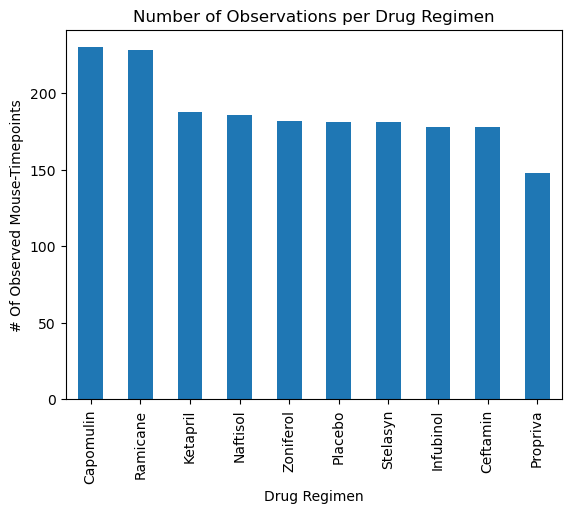

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
bar_data = clean_data['Drug Regimen'].value_counts()
bar_data.plot(kind='bar', legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse-Timepoints')
plt.title('Number of Observations per Drug Regimen')
plt.show()

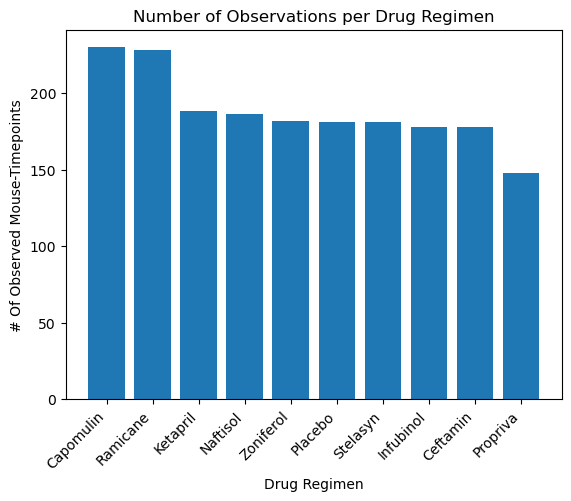

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
plt.bar(bar_data.index, bar_data)
plt.xlabel('Drug Regimen')
plt.ylabel('# Of Observed Mouse-Timepoints')
plt.title('Number of Observations per Drug Regimen')
plt.xticks(rotation=45, ha='right')
plt.show()

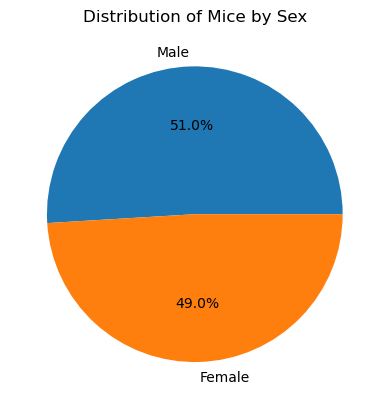

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = clean_data['Sex'].value_counts()
pie_data.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Mice by Sex')
plt.ylabel('')
plt.show()

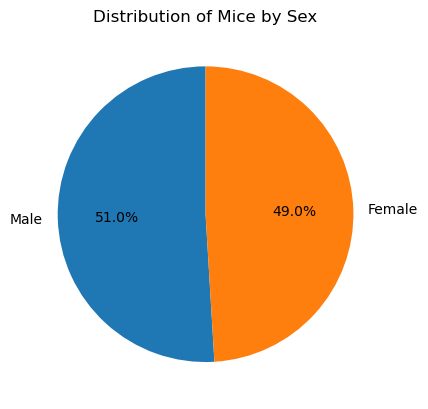

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Mice by Sex')
plt.ylabel('')
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_by_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(clean_data, mouse_by_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {treatment: [] for treatment in treatments}

# Calculate the IQR and determine potential outliers for each treatment
for treatment in treatments:
    treatment_data = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data[treatment] = treatment_data

    quartiles = treatment_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    if not outliers.empty:
        print(f"{treatment} potential outliers: {outliers}")
    else:
        print(f"{treatment} has no outliers")

Capomulin has no outliers
Ramicane has no outliers
Infubinol potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin has no outliers


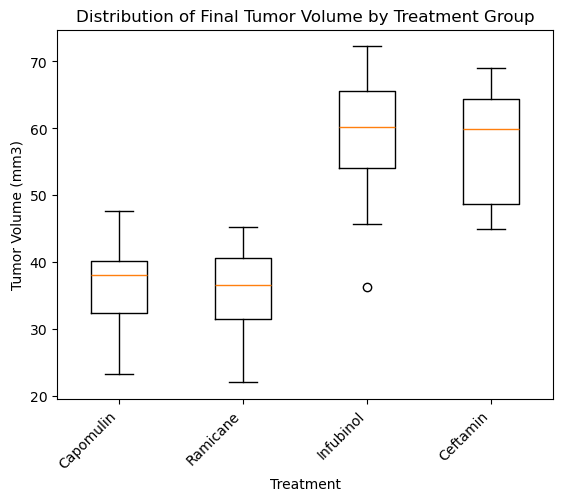

In [31]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group
fig1, ax1 = plt.subplots()
ax1.boxplot([tumor_vol_data[treatment] for treatment in treatments], labels=treatments)
ax1.set_title('Distribution of Final Tumor Volume by Treatment Group')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Treatment')
plt.xticks(rotation=45, ha='right')
plt.show()

## Line and Scatter Plots

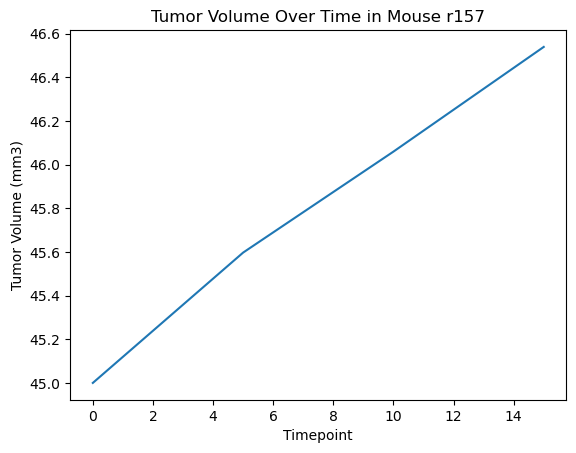

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mighty_mouse = 'r157'
one_mouse_dataset = clean_data[clean_data['Mouse ID'] == mighty_mouse]

plt.plot(one_mouse_dataset['Timepoint'], one_mouse_dataset['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume Over Time in Mouse {mighty_mouse}')
plt.show()


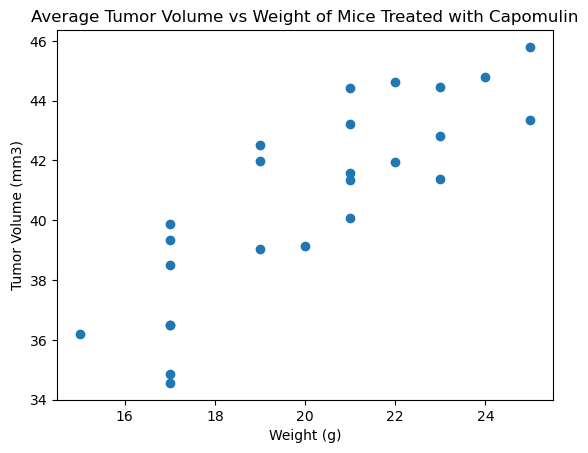

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_dataset = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
# Group by 'Mouse ID' and calculate the mean for numeric columns
capomulin_avg = capomulin_dataset.groupby('Mouse ID').mean(numeric_only=True)

plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs Weight of Mice Treated with Capomulin')
plt.show()

## Correlation and Regression

The correlation coefficient of mouse weight and average observed tumor volume for the Capomulin regimen is 0.84.


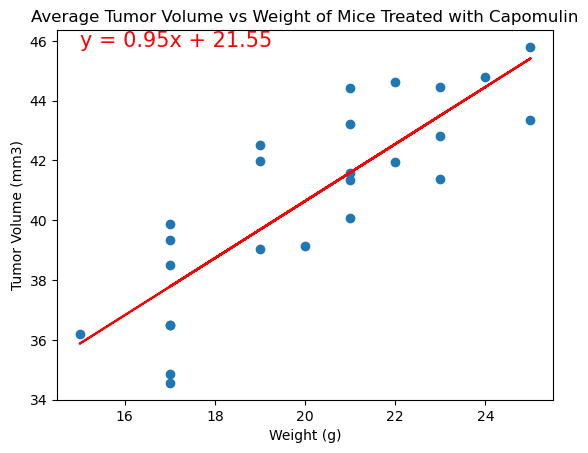

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Correlation coefficient
correlation_coefficient = capomulin_avg['Weight (g)'].corr(capomulin_avg['Tumor Volume (mm3)'])
print(f"The correlation coefficient of mouse weight and average observed tumor volume for the Capomulin regimen is {correlation_coefficient:.2f}.")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
regress_values = capomulin_avg['Weight (g)'] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'], regress_values, "r-")
plt.annotate(line_eq, (capomulin_avg['Weight (g)'].min(), capomulin_avg['Tumor Volume (mm3)'].max()), fontsize=15, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs Weight of Mice Treated with Capomulin')
plt.show()